1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

--------------------Inverse Transform Method-----------------


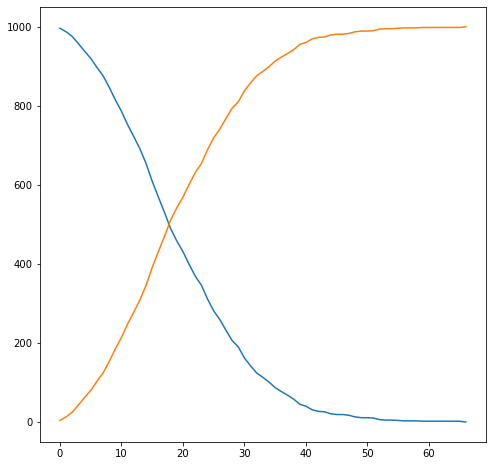

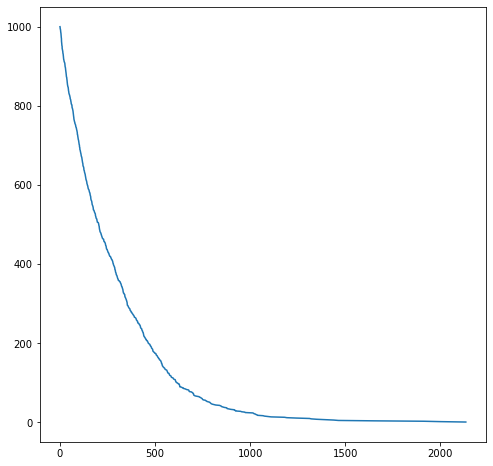

In [127]:
import numpy as np
import matplotlib.pyplot as plt

HL = round(3.052*60) # seconds
number_of_T = 1000
number_of_Pb = 0
t = 0
TI_List = []
Pb_List = []
while number_of_T > 0:
    t=t+1
    P_t = 1- 2**(-t/HL)
    for i in range(number_of_T):
        if np.random.random() < P_t:
            number_of_T -= 1
            number_of_Pb += 1  
    TI_List.append(number_of_T)
    Pb_List.append(number_of_Pb)
    #print(t)
TimeList = [i for i in range(t)]        
plt.figure(figsize=(8,8))
plt.plot(TimeList,TI_List)
plt.plot(TimeList,Pb_List)
print("--------------------Inverse Transform Method-----------------")


plt.figure(figsize=(8,8))
ti = np.random.random(1000)
ti = -HL * np.log2(1-ti)
# Inverse of the p(t) to determine the time according to non-uniform prob.dist. 
ti = np.sort(ti)
# We know that the time must be sorted.
plt.plot(ti, np.arange(1000,0, -1))

    



2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Mean of the Integration:  1.17856725
Standard deviation:  0.025296485228930517
error: 0.89% 
Value of A was arranged as 2 at the beginning with 13% error.
After the error calculation A has been arranged as: 1.75 
giving the error more or less 1%
-----------------------Mean Value Method------------------------
Mean Value Integral:  1.3603657411314167
Error of MVM: 14% 


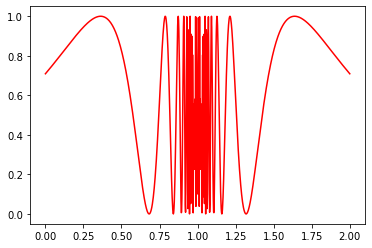

In [68]:
# From analytical solution Integral value is 1-sin(4)/4 = 1.18920
I_analytical = 1-np.sin(4)/4
A = 1.75
def f(x):
    return (np.sin(1. / (1 - x)))**2

x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'r-')

# Monte Carlo integration
N = 1000

myIntArr = np.zeros(N)
for j in range(N):    
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I = A * count / N  
    myIntArr[j] = I


#print(myIntArr)   
myIntMean = myIntArr.mean()
print("Mean of the Integration: ",myIntMean)
myStd = np.std(myIntArr)
print("Standard deviation: ",myStd)
err = np.abs((myIntMean-I_analytical)/I_analytical*100)
print("error: %.2f%% " %err)
#plt.figure()
#plt.plot(range(N),myIntArr,'b')
print("Value of A was arranged as 2 at the beginning with 13%% error.\nAfter the error calculation A has been arranged as: %.2f \ngiving the error more or less 1%%" %A)
print("-----------------------Mean Value Method------------------------")

I_MVM = 0

for k in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    I_MVM = I_MVM + 2 * f(x) / N

err_mvm = np.abs((I_MVM-I_analytical)/I_analytical*100)
print("Mean Value Integral: ",I_MVM)
print("Error of MVM: %2.f%% " %err_mvm)

# As we can see from the results, order of error for MVM is higher than hit/miss method when rescale factor is
# applied in hit/miss method. Before the scale factor, order of error is the same.



3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [97]:
import math
# We know the area of a unit circle is equal to pi(3.14..) 
Area_known = np.pi
print(Area_known)
def circlefun(x,y):
    if (x**2 + y**2) <= 1:
        return 1
    else:
        return 0

Area = 4.05 #  Area of the box including the unit circle.
N = 100000
counter = 0

for i in range(N):  
    x = np.random.random()
    y = np.random.random()
    if circlefun(x,y)==1:
        counter += 1
I2 = Area * counter / N
err2 = np.abs((I2-Area_known)/I2*100)
print("Area calculated: %.4f " %I2)
print("Error: %.4f%%" %err2)

print("----------------------10D-Sphere-----------------------")

def nSphereVolume(dim, iterations):
    count_in_sphere = 0

    for count_loops in range(iterations):
        point = np.random.uniform(-1.0, 1.0, dim)
        distance = np.linalg.norm(point)
        if distance < 1.0:
            count_in_sphere += 1

    return np.power(2.0, dim) * (count_in_sphere / iterations)
V_MC = nSphereVolume(10, 100000)
print("V_Theoretical: ",V_Theoretical)
print("V_MC: ", V_MC)
V_Theoretical = np.pi**(10 // 2) / math.factorial(10 // 2)   
print("Error: %.2f%%" %np.abs((V_MC-V_Theoretical)/V_Theoretical*100))


3.141592653589793
Area calculated: 3.1833 
Error: 1.3089%
----------------------10D-Sphere-----------------------
V_Theoretical:  2.550164039877345
V_MC:  2.42688
Error: 4.83%


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [106]:
def myWeighted(x):
    return 1/np.sqrt(x)

def myFunction(x):
    return (1/np.sqrt(x))/(np.e**x+1)

N = 100000
x = np.random.rand(N)
# Integral result of weighted function from 0 to 1 is "2".
h_is =   2.0 / N * np.sum(myFunction(x) / myWeighted(x))
print("IS integral:", h_is)
print("Theoretical result should be around 0.84.")
print("Error: %.2f%% " %np.abs((h_is-0.84)/0.84*100))

IS integral: 0.7601565518516816
Theoretical result should be around 0.84.
Error: 9.51% 
